In [1]:
import seaborn as sns 
import pandas as pd 
import numpy as np

In [ ]:
# config our data 

In [3]:
df = pd.read_csv('../Datas/advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
X = df.drop('Sales' , axis =1 )

In [19]:
X = X.drop(columns=['Unnamed: 0'] , axis =1 )

In [31]:
y = df['Sales']



In [61]:
# first we set Polynominal

In [105]:
from sklearn.preprocessing import PolynomialFeatures


In [109]:
polynominal_convert = PolynomialFeatures(degree=2, include_bias=False)

In [115]:
# our fetures
poly_fetures = polynominal_convert.fit_transform(X)

In [45]:
poly_fetures.shape

(200, 9)

In [47]:
poly_fetures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [71]:
# training data 
X_train , X_test , y_train , y_test = train_test_split(
    poly_fetures , y , test_size=0.3 , random_state=101
)

In [73]:
X_train

array([[1.93200e+02, 1.84000e+01, 6.57000e+01, ..., 3.38560e+02,
        1.20888e+03, 4.31649e+03],
       [2.87600e+02, 4.30000e+01, 7.18000e+01, ..., 1.84900e+03,
        3.08740e+03, 5.15524e+03],
       [8.02000e+01, 0.00000e+00, 9.20000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.46400e+01],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [53]:
# linear regration as always
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression(fit_intercept=True)

In [57]:
model.fit(X_train , y_train)

LinearRegression()

In [81]:
predection = model.predict(X_test)

In [79]:
# import our error method MSE , MAE , R2_score
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [133]:
r2 = r2_score(y_test , predection)

In [129]:
mean_squared_error(y_test , predection )

0.44175055104035904

In [131]:
mean_absolute_error(y_test , predection)

0.48967980448037096

In [97]:
# coeffient 
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [117]:
y.mean()

14.0225

In [101]:
# intercept 
model.intercept_

5.125557423132571

In [135]:
# corrolation 
cor = X.corr()

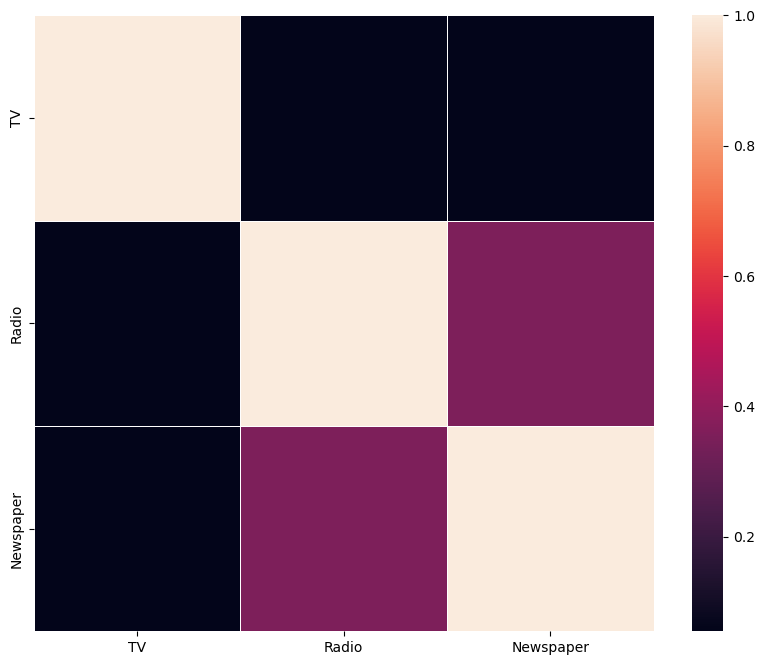

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(cor , annot=True, cmap='coolwarm' , linewidths=0.5)
plt.show()